In [8]:
library(pcaMethods)
library(pcaReduce)
library(SC3)
library(scater)
library(SingleCellExperiment)
library(pheatmap)
library(mclust)
set.seed(1234567)

In [ ]:
# 3 main types of clustering methods -- for single-cell 
#   unsupervised clustering is the best.
#
# 1. Heirarchal clustering - You can use both a top-down or bottom-up
#    approach. In the former case, each cell is initially assigned to
#    it's own cluster, and then pairs of clusters are merged to create
#    heirarchy.
#    - For top down you typically start with all observations in one
#      cluster, and then recursively split each cluster to form a heirarchy .
#      - It's deterministic, so reproducible.

# 2. K-means - Here you must partition N cells into k different clusters,
#    performed iteratively, and cluster centroids are assigned and each cell
#    is assigned to its nearest cluster. You repeat until you reach stable
#    config.

# 3. Graph-based - You must identify groups or modules of nodes in a network
#    First you build a graph where each node is a cell, and then you assign
#    weights to the edges between nodes. Assigning edges and weights is
#    not trivial, but it is still faster and efficient when dealing with
#    lots of cell types



In [3]:
deng <- readRDS("deng/deng-reads.rds")
deng

# Here we see the annotations provided by cell data
table(colData(deng)$cell_type2)

#plotPCA(deng, colour_by = "cell_type2")
# A quick PCA of cell types
# already shows seperation and clustering in the data
# -- The early cell types (top-left corner) seperate reasonably well
#   But the blast timepoints (early, mid, late) do not (notice the yellow
#   and pink mixed).


class: SingleCellExperiment 
dim: 22431 268 
metadata(0):
assays(2): counts logcounts
rownames(22431): Hvcn1 Gbp7 ... Sox5 Alg11
rowData names(10): feature_symbol is_feature_control ... total_counts
  log10_total_counts
colnames(268): 16cell 16cell.1 ... zy.2 zy.3
colData names(30): cell_type2 cell_type1 ... pct_counts_ERCC
  is_cell_control
reducedDimNames(0):
spikeNames(1): ERCC


    16cell      4cell      8cell early2cell earlyblast  late2cell  lateblast 
        50         14         37          8         43         10         30 
  mid2cell   midblast         zy 
        12         60          4 

Estimating k...


[1] 6

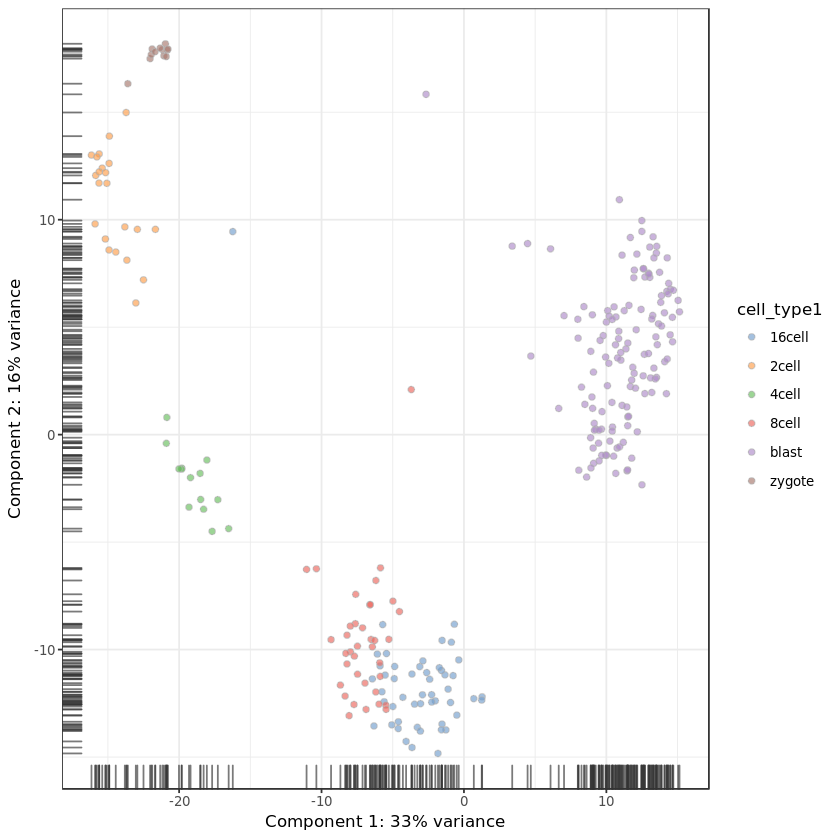

In [4]:
# Let's try this with SC3 (it can directly ingest singlecellexperiment)
deng <- sc3_estimate_k(deng)
## Estimate k...
metadata(deng)$sc3$k_estimation

# this is the number of predicted cell types, and it is interestingly
# less than the original data annotation (10).
# - Let's store the merged cell types in the cell_type1 slot
plotPCA(deng, colour_by = "cell_type1")

In [7]:
# We can see that the blast cells have been merged together
# but let's run SC3 and ask it to calculate the biological properties
# of the clusters.

deng_n <- sc3(deng[1:100,1:100], ks=10, biology=TRUE)
#head(counts(deng[1:10,1:10]))


Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...
Calculating biology...
